<a href="https://colab.research.google.com/github/masilazev/A3UnP-House-Price-Prediction-in-Python-Machine-Learning/blob/main/2%C2%AA_vers%C3%A3o_projeto_machine_learning_previs%C3%A3o_de_pre%C3%A7o_de_im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas nescessárias para manipulação de dados (Pandas e NumPy), visualização (Matplotlib e Seaborn), e para a construção de modelos de regressão linear (Scikit-Learn).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Ler o arquivo .csv

In [ ]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Exibir informações sobre o conjunto de dados, como o tipo de dados e se há valores nulos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Remove linhas com valores nulos do conjunto de dados, salva e exibe novamente as informações.

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


True = Celula Vazia

In [ ]:
data.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


Dividir dados em treinamento, teste e dividi-los em X e Y

In [ ]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

Ver X

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


Ver Y

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

Divide os dados em conjuntos de treino e teste.

0.2 = 20% separado para validação

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4711,-118.35,34.06,48.0,3551.0,826.0,1601.0,827.0,3.2279,<1H OCEAN,400000.0
12100,-117.34,33.94,20.0,4589.0,594.0,1660.0,595.0,7.4141,INLAND,236500.0
17013,-122.28,37.53,25.0,3710.0,1015.0,2068.0,958.0,3.5445,NEAR OCEAN,286700.0
14547,-117.25,32.94,16.0,4755.0,807.0,1829.0,756.0,6.7694,NEAR OCEAN,425900.0
7163,-118.17,34.04,46.0,705.0,167.0,655.0,149.0,3.5938,<1H OCEAN,141100.0
...,...,...,...,...,...,...,...,...,...,...
16245,-121.26,37.98,32.0,3274.0,820.0,2050.0,738.0,2.1265,INLAND,55700.0
6244,-117.99,34.05,35.0,1792.0,317.0,1441.0,306.0,3.7917,<1H OCEAN,151100.0
8669,-118.43,33.82,34.0,2112.0,614.0,946.0,574.0,4.6048,NEAR OCEAN,500001.0
3520,-118.49,34.27,34.0,4877.0,815.0,2521.0,781.0,5.5714,<1H OCEAN,225900.0


Gera histogramas das variáveis do conjunto de treino.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

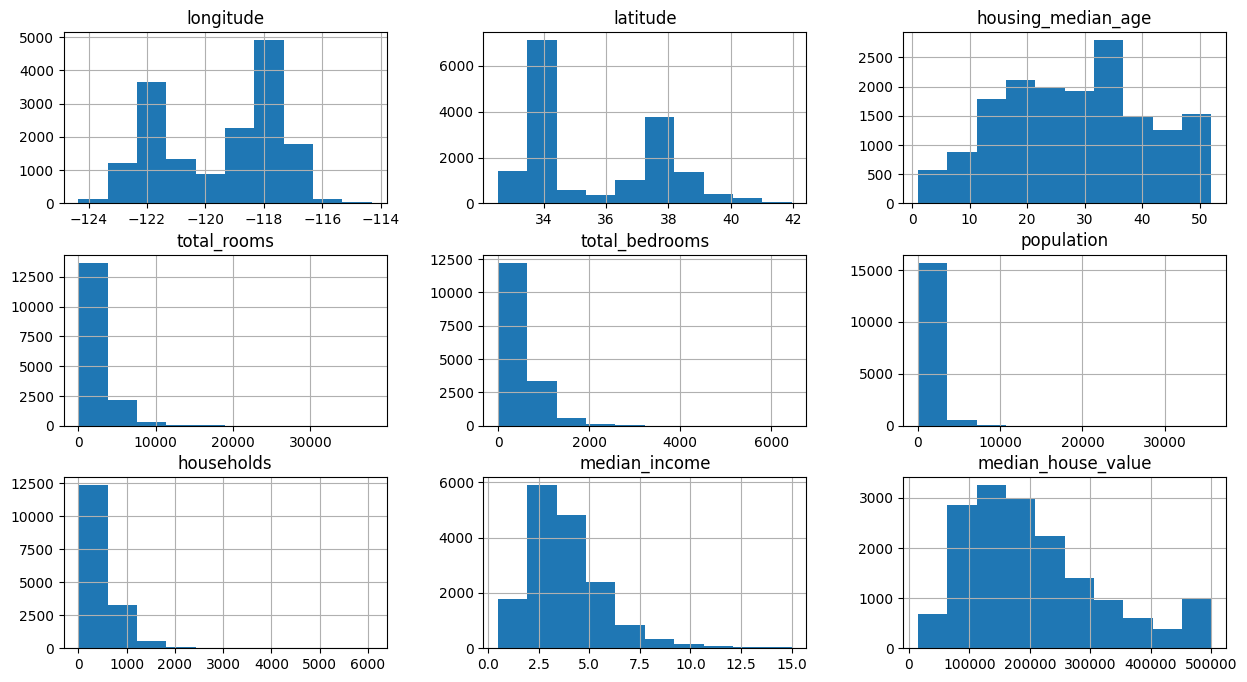

In [ ]:
train_data.hist(figsize=(15, 8))

Cria um mapa de calor para visualizar a correlação entre as variáveis do conjunto de treino.

<ipython-input-68-b46b043f08b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

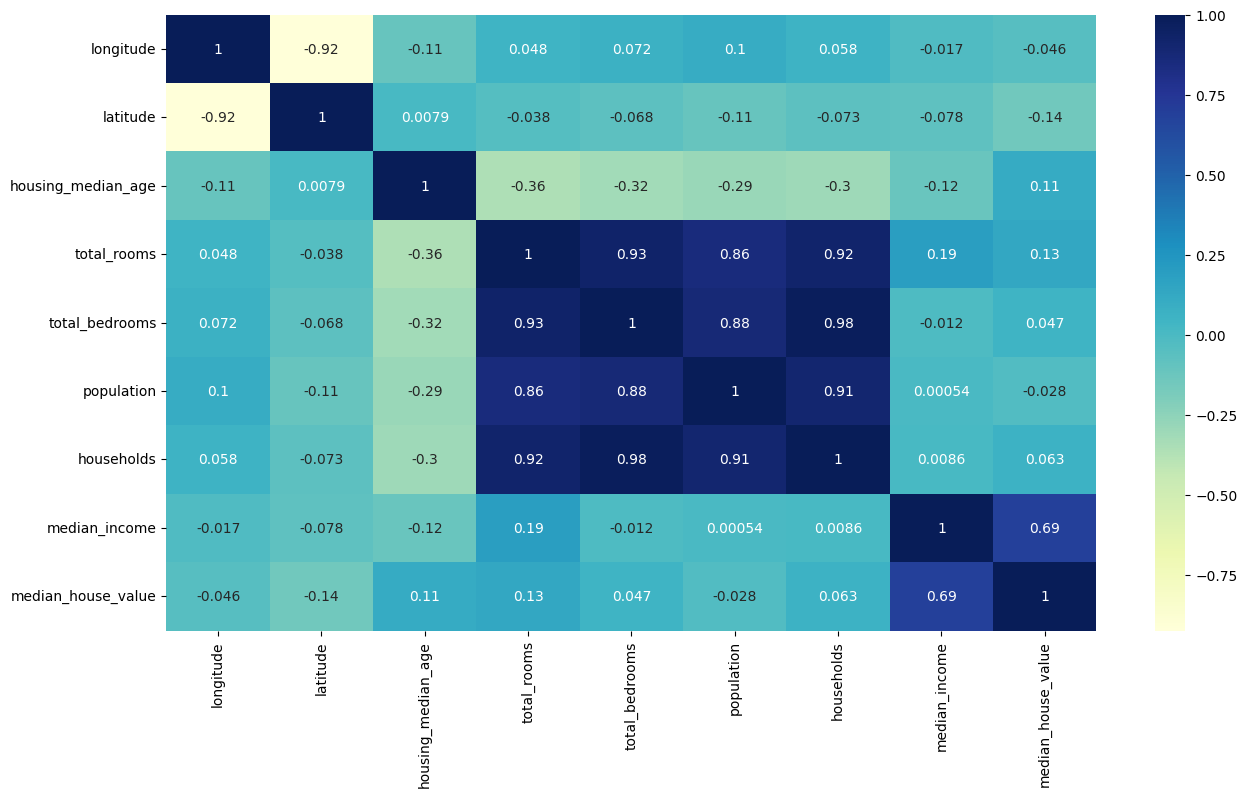

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Aplica o logaritmo natural a algumas variáveis para transformação dos dados.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

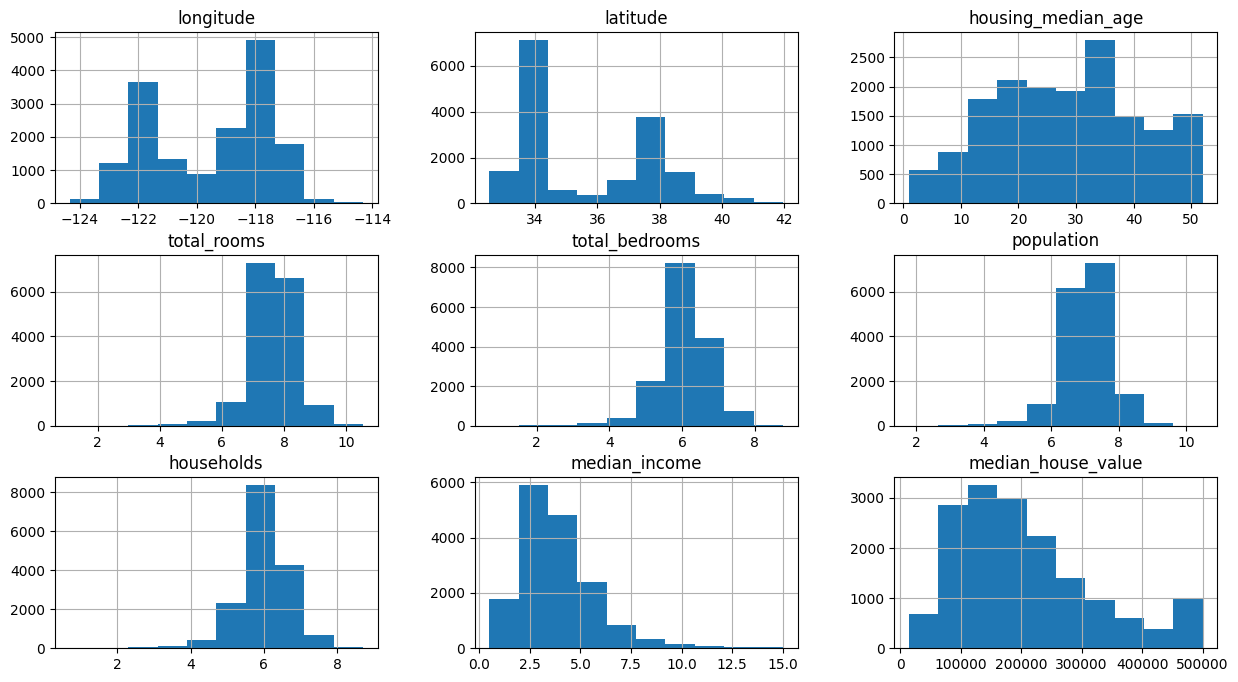

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize=(15,8))

Transformar "ocean_proximity" em valores numericos

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4711,-118.35,34.06,48.0,8.175266,6.717805,7.379008,6.719013,3.2279,400000.0,1,0,0,0,0
12100,-117.34,33.94,20.0,8.431635,6.388561,7.415175,6.390241,7.4141,236500.0,0,1,0,0,0
17013,-122.28,37.53,25.0,8.219057,6.923629,7.634821,6.865891,3.5445,286700.0,0,0,0,0,1
14547,-117.25,32.94,16.0,8.467162,6.694562,7.512071,6.629363,6.7694,425900.0,0,0,0,0,1
7163,-118.17,34.04,46.0,6.559615,5.123964,6.486161,5.010635,3.5938,141100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16245,-121.26,37.98,32.0,8.094073,6.710523,7.626083,6.605298,2.1265,55700.0,0,1,0,0,0
6244,-117.99,34.05,35.0,7.491645,5.762051,7.273786,5.726848,3.7917,151100.0,1,0,0,0,0
8669,-118.43,33.82,34.0,7.655864,6.421622,6.853299,6.354370,4.6048,500001.0,0,0,0,0,1
3520,-118.49,34.27,34.0,8.492491,6.704414,7.832808,6.661855,5.5714,225900.0,1,0,0,0,0


<Axes: >

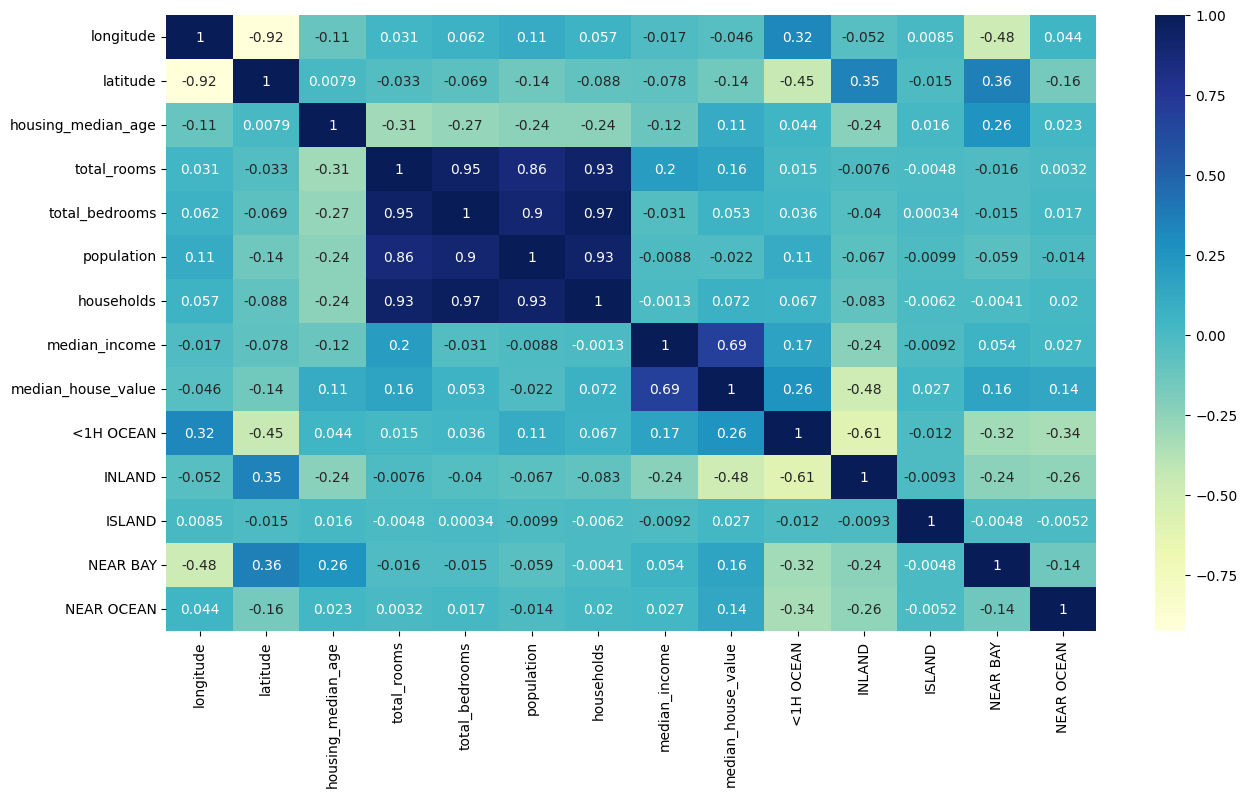

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Quanto mais quente a cor do imóvel mais próximo a costa e consequentemente mais caro. O que representa o "ocean_proximity"

<Axes: xlabel='latitude', ylabel='longitude'>

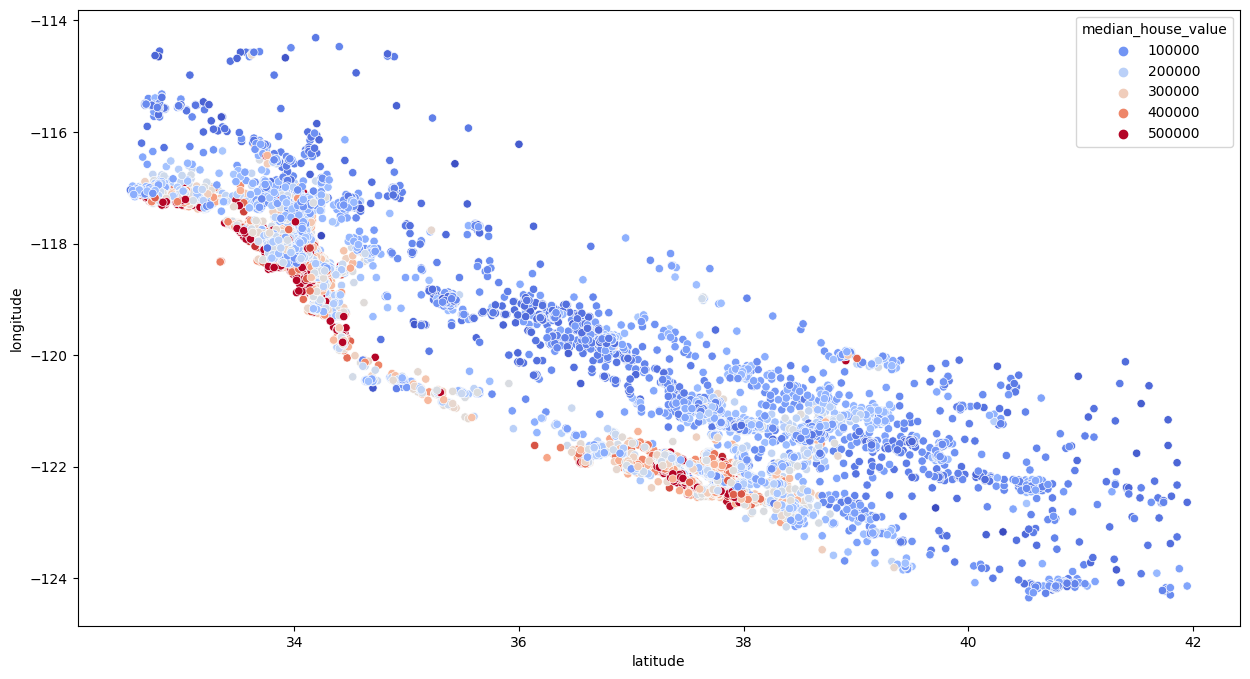

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

Numero de camas por quarto

In [ ]:
train_data['bedroom-ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

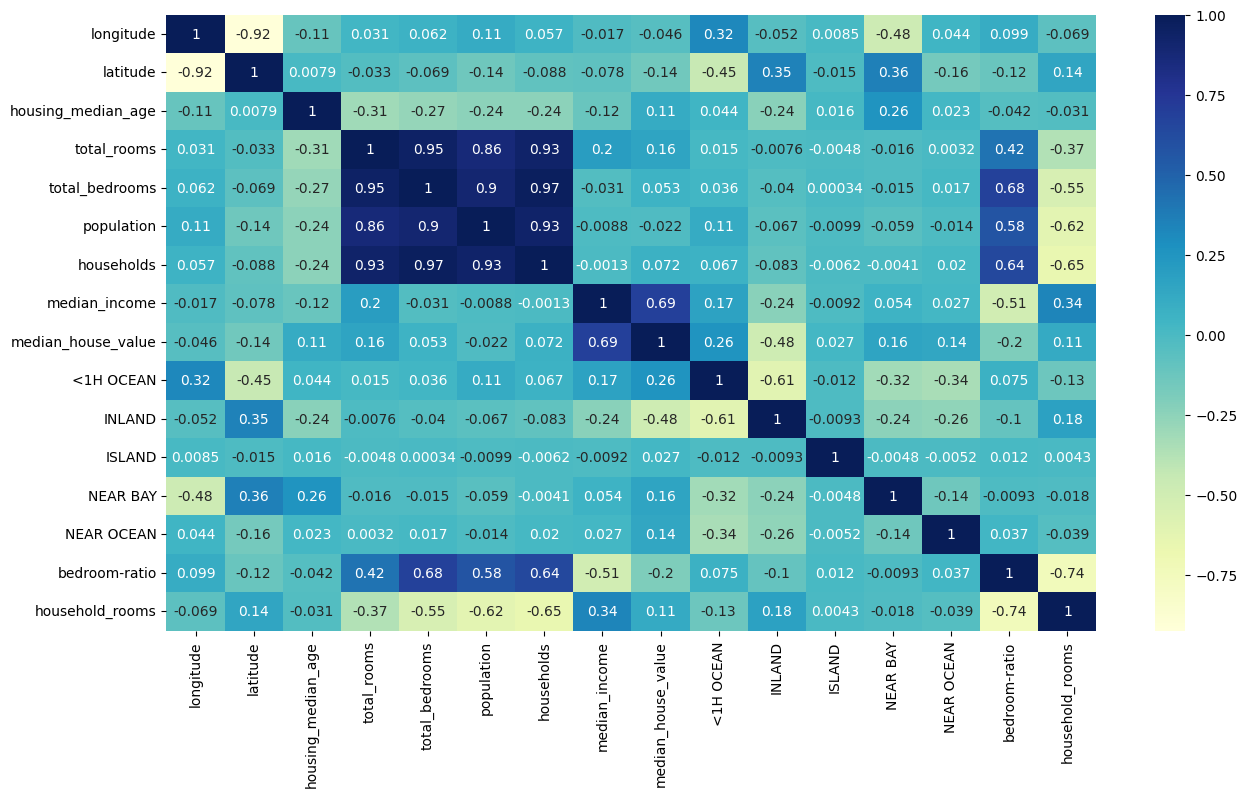

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

Preparação dos Dados de Teste

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom-ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

Avaliação do Modelo de Regressão Linear:

Score = Pontuação

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

0.6752453513926436

Avaliação do Melhor Modelo nos Dados:

Leva um pouco mais de tempo para treinar, mas conseguimos ter um Score (Pontuação ou Resultado) melhor (mais preciso)

In [ ]:
forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

forest.score(x_test_s, y_test)

0.8224606150229972

Validação Cruzada


A validação Cruzada K-fold é uma técnica em machine learning para avaliar a performance de um modelo. Ela divide o conjunto de dados em K partes, treinando o modelo K vezes. Em cada treinamento, K-1 partes são usadas para treino e a parte restante é usada para avaliação. Esse processo é repetido K vezes, e as métricas de desempenho são geralmente combinadas ao final para fornecer uma avaliação global. Essa abordagem ajuda a reduzir a variabilidade na avaliação do modelo, sendo útil quando há uma quantidade limitada de dados. Em resumo, a validação K-fold proporciona uma avaliação mais robusta do modelo, testando-o em diferentes subconjuntos dos dados.

In [ ]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
scoring="neg_mean_squared_error",
return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.822381298663698

Podemos observar que houve uma pequena melhora no resultado.
De 0.8105 para 0.8128